In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [5]:
t2_dat=t2_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [6]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [7]:
t2_dat=data_restore(t2_dat)
t4_dat=data_restore(t4_dat)

In [8]:
total_dat_temp=np.vstack([t2_dat.values,t4_dat.values])

In [9]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [10]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [11]:
total_dat=total_dat_temp.drop(del_index)

In [12]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [13]:
data=total_dat.values

In [14]:
log_dat_x=np.log(data[:,:6])

In [15]:
pow_dat_x=np.power(data[:,:6],2)

In [16]:
log_dat_y=np.log(data[:,6])

In [17]:
x_train=np.hstack([log_dat_x,data[:,:6],pow_dat_x])

In [18]:
mean_x=np.mean(x_train, axis=0)
std_x=np.std(x_train, axis=0)

In [19]:
x_train=(x_train - mean_x) / std_x

In [20]:
mean_y=np.mean(log_dat_y)
std_y=np.std(log_dat_y)

In [21]:
y_train=(log_dat_y-mean_y)/std_y

In [22]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [23]:
model=nn.Linear(18,1)

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1091,  0.0993,  0.1770,  0.0589, -0.0900, -0.1189,  0.0099, -0.0960,
         -0.2240,  0.1958,  0.1707, -0.1080, -0.0186,  0.1344,  0.1893,  0.0790,
          0.1012, -0.0589]], requires_grad=True), Parameter containing:
tensor([0.1871], requires_grad=True)]


In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [26]:
nb_epochs = 100000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100000 Cost: 0.819433
Epoch  100/100000 Cost: 0.810790
Epoch  200/100000 Cost: 0.802255
Epoch  300/100000 Cost: 0.793826
Epoch  400/100000 Cost: 0.785501
Epoch  500/100000 Cost: 0.777280
Epoch  600/100000 Cost: 0.769161
Epoch  700/100000 Cost: 0.761142
Epoch  800/100000 Cost: 0.753223
Epoch  900/100000 Cost: 0.745403
Epoch 1000/100000 Cost: 0.737679
Epoch 1100/100000 Cost: 0.730051
Epoch 1200/100000 Cost: 0.722517
Epoch 1300/100000 Cost: 0.715077
Epoch 1400/100000 Cost: 0.707729
Epoch 1500/100000 Cost: 0.700471
Epoch 1600/100000 Cost: 0.693304
Epoch 1700/100000 Cost: 0.686225
Epoch 1800/100000 Cost: 0.679234
Epoch 1900/100000 Cost: 0.672329
Epoch 2000/100000 Cost: 0.665509
Epoch 2100/100000 Cost: 0.658774
Epoch 2200/100000 Cost: 0.652121
Epoch 2300/100000 Cost: 0.645551
Epoch 2400/100000 Cost: 0.639062
Epoch 2500/100000 Cost: 0.632653
Epoch 2600/100000 Cost: 0.626323
Epoch 2700/100000 Cost: 0.620071
Epoch 2800/100000 Cost: 0.613896
Epoch 2900/100000 Cost: 0.607796
Epoch 3000

Epoch 25000/100000 Cost: 0.139101
Epoch 25100/100000 Cost: 0.138628
Epoch 25200/100000 Cost: 0.138161
Epoch 25300/100000 Cost: 0.137698
Epoch 25400/100000 Cost: 0.137239
Epoch 25500/100000 Cost: 0.136785
Epoch 25600/100000 Cost: 0.136336
Epoch 25700/100000 Cost: 0.135891
Epoch 25800/100000 Cost: 0.135451
Epoch 25900/100000 Cost: 0.135015
Epoch 26000/100000 Cost: 0.134583
Epoch 26100/100000 Cost: 0.134156
Epoch 26200/100000 Cost: 0.133733
Epoch 26300/100000 Cost: 0.133313
Epoch 26400/100000 Cost: 0.132899
Epoch 26500/100000 Cost: 0.132488
Epoch 26600/100000 Cost: 0.132081
Epoch 26700/100000 Cost: 0.131678
Epoch 26800/100000 Cost: 0.131280
Epoch 26900/100000 Cost: 0.130885
Epoch 27000/100000 Cost: 0.130494
Epoch 27100/100000 Cost: 0.130106
Epoch 27200/100000 Cost: 0.129723
Epoch 27300/100000 Cost: 0.129343
Epoch 27400/100000 Cost: 0.128967
Epoch 27500/100000 Cost: 0.128595
Epoch 27600/100000 Cost: 0.128226
Epoch 27700/100000 Cost: 0.127861
Epoch 27800/100000 Cost: 0.127499
Epoch 27900/10

Epoch 49400/100000 Cost: 0.090901
Epoch 49500/100000 Cost: 0.090821
Epoch 49600/100000 Cost: 0.090741
Epoch 49700/100000 Cost: 0.090662
Epoch 49800/100000 Cost: 0.090583
Epoch 49900/100000 Cost: 0.090504
Epoch 50000/100000 Cost: 0.090426
Epoch 50100/100000 Cost: 0.090349
Epoch 50200/100000 Cost: 0.090271
Epoch 50300/100000 Cost: 0.090194
Epoch 50400/100000 Cost: 0.090117
Epoch 50500/100000 Cost: 0.090040
Epoch 50600/100000 Cost: 0.089964
Epoch 50700/100000 Cost: 0.089888
Epoch 50800/100000 Cost: 0.089812
Epoch 50900/100000 Cost: 0.089737
Epoch 51000/100000 Cost: 0.089662
Epoch 51100/100000 Cost: 0.089588
Epoch 51200/100000 Cost: 0.089513
Epoch 51300/100000 Cost: 0.089439
Epoch 51400/100000 Cost: 0.089365
Epoch 51500/100000 Cost: 0.089291
Epoch 51600/100000 Cost: 0.089218
Epoch 51700/100000 Cost: 0.089145
Epoch 51800/100000 Cost: 0.089072
Epoch 51900/100000 Cost: 0.089000
Epoch 52000/100000 Cost: 0.088928
Epoch 52100/100000 Cost: 0.088856
Epoch 52200/100000 Cost: 0.088784
Epoch 52300/10

Epoch 73800/100000 Cost: 0.077166
Epoch 73900/100000 Cost: 0.077123
Epoch 74000/100000 Cost: 0.077080
Epoch 74100/100000 Cost: 0.077038
Epoch 74200/100000 Cost: 0.076995
Epoch 74300/100000 Cost: 0.076953
Epoch 74400/100000 Cost: 0.076910
Epoch 74500/100000 Cost: 0.076868
Epoch 74600/100000 Cost: 0.076826
Epoch 74700/100000 Cost: 0.076784
Epoch 74800/100000 Cost: 0.076742
Epoch 74900/100000 Cost: 0.076699
Epoch 75000/100000 Cost: 0.076657
Epoch 75100/100000 Cost: 0.076615
Epoch 75200/100000 Cost: 0.076573
Epoch 75300/100000 Cost: 0.076532
Epoch 75400/100000 Cost: 0.076490
Epoch 75500/100000 Cost: 0.076448
Epoch 75600/100000 Cost: 0.076406
Epoch 75700/100000 Cost: 0.076364
Epoch 75800/100000 Cost: 0.076323
Epoch 75900/100000 Cost: 0.076281
Epoch 76000/100000 Cost: 0.076239
Epoch 76100/100000 Cost: 0.076198
Epoch 76200/100000 Cost: 0.076156
Epoch 76300/100000 Cost: 0.076115
Epoch 76400/100000 Cost: 0.076073
Epoch 76500/100000 Cost: 0.076032
Epoch 76600/100000 Cost: 0.075991
Epoch 76700/10

Epoch 98200/100000 Cost: 0.068180
Epoch 98300/100000 Cost: 0.068147
Epoch 98400/100000 Cost: 0.068115
Epoch 98500/100000 Cost: 0.068083
Epoch 98600/100000 Cost: 0.068051
Epoch 98700/100000 Cost: 0.068020
Epoch 98800/100000 Cost: 0.067988
Epoch 98900/100000 Cost: 0.067956
Epoch 99000/100000 Cost: 0.067924
Epoch 99100/100000 Cost: 0.067892
Epoch 99200/100000 Cost: 0.067860
Epoch 99300/100000 Cost: 0.067828
Epoch 99400/100000 Cost: 0.067796
Epoch 99500/100000 Cost: 0.067765
Epoch 99600/100000 Cost: 0.067733
Epoch 99700/100000 Cost: 0.067701
Epoch 99800/100000 Cost: 0.067669
Epoch 99900/100000 Cost: 0.067638
Epoch 100000/100000 Cost: 0.067606


In [27]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1678, -0.0046,  0.1310, -0.0405, -0.1878, -0.4654, -0.0488, -0.1815,
         -0.2701,  0.0963,  0.0663, -0.2873, -0.0774,  0.0719,  0.1434, -0.0205,
         -0.0061, -0.1312]], requires_grad=True), Parameter containing:
tensor([0.0253], requires_grad=True)]


In [28]:
x=np.squeeze(model(x_train).detach().numpy())

In [29]:
y=y_train.detach().numpy()

In [30]:
x.shape

(306,)

In [31]:
y.shape

(306,)

<function matplotlib.pyplot.show(*args, **kw)>

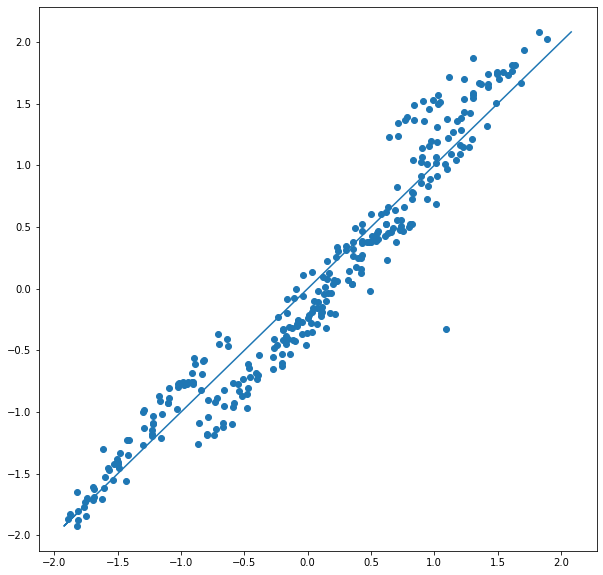

In [32]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show